<a href="https://colab.research.google.com/github/lazy-bro/Boom_Models/blob/main/CIFAR10_Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.layers import Dropout, BatchNormalization

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.cifar10.load_data()

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
Y_test.shape

(10000, 1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
np.unique(Y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([[[ 28,  35,  39],
        [ 30,  34,  44],
        [ 33,  44,  47],
        ...,
        [ 43,  56,  45],
        [ 52,  64,  53],
        [ 46,  58,  47]],

       [[ 27,  30,  38],
        [ 27,  28,  41],
        [ 21,  31,  39],
        ...,
        [112, 136,  97],
        [117, 140, 101],
        [115, 138, 100]],

       [[ 34,  36,  42],
        [ 33,  33,  43],
        [ 24,  30,  40],
        ...,
        [175, 208, 143],
        [177, 209, 144],
        [176, 208, 143]],

       ...,

       [[142, 176, 118],
        [142, 176, 118],
        [150, 184, 127],
        ...,
        [134, 175, 119],
        [128, 168, 112],
        [134, 175, 119]],

       [[140, 176, 124],
        [145, 180, 129],
        [150, 186, 134],
        ...,
        [131, 170, 119],
        [130, 170, 119],
        [122, 162, 111]],

       [[134, 171, 123],
        [136, 171, 124],
        [136, 171, 124],
        ...,
        [106, 144, 100],
        [104, 142,  99],
        [101, 140,  96]]], dtype=uint8)
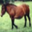

In [ ]:
X_train[7]

In [ ]:
model = keras.Sequential()

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

In [ ]:
datagen.fit(X_train)

In [ ]:
model.add(keras.layers.Conv2D(
    32,
    (3,3),
    activation="relu",
    input_shape=(32,32,3),
    padding='same'
)
)
model.add(BatchNormalization())

In [ ]:
model.add(keras.layers.Conv2D(
    32,
    (3,3),
    activation="relu",
    padding='same'
)
)

In [ ]:
model.add(keras.layers.MaxPooling2D(
    pool_size=(2, 2)
))
model.add(Dropout(0.25))

In [ ]:
model.add(keras.layers.Conv2D(
    64,
    (3,3),
    activation="relu",
    padding='same'
)
)
model.add(BatchNormalization())

In [ ]:
model.add(keras.layers.Conv2D(
    64,
    (3,3),
    activation="relu",
    padding='same'
)
)

In [ ]:
model.add(keras.layers.MaxPooling2D(
    pool_size=(2, 2)
))
model.add(Dropout(0.25))

In [ ]:
model.add(keras.layers.Flatten())

In [ ]:
model.add(keras.layers.Dense(512, activation="relu"))

In [ ]:
model.add(Dropout(0.5))

In [ ]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,746 (8.27 MB)

 Trainable params: 2,168,554 (8.27 MB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
model.compile(
    optimizer="adam",
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
callback1 = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=5
)

In [ ]:
model.fit(
    x=X_train,
    y=Y_train,
    batch_size=64,
    epochs=100,
    verbose="auto",
    #callbacks=[callback1],
    validation_data=(X_test, Y_test)
)

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.2998 - loss: 2.1265 - val_accuracy: 0.4913 - val_loss: 1.3700
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4939 - loss: 1.3852 - val_accuracy: 0.5824 - val_loss: 1.1679
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.5888 - loss: 1.1506 - val_accuracy: 0.6577 - val_loss: 0.9668
Epoch 4/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6486 - loss: 1.0002 - val_accuracy: 0.6916 - val_loss: 0.8669
Epoch 5/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6849 - loss: 0.9058 - val_accuracy: 0.6869 - val_loss: 0.9008
Epoch 6/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7163 - loss: 0.8224 - val_accuracy: 0.6867 - val_loss: 0.8836
Epoch 7/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7355 - loss: 0.7632 - val_accuracy: 0.7425 - val_loss: 0.7550
Epoch 8/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7498 - loss: 0.7201 - val

In [ ]:
model.evaluate(
    x=X_test,
    y=Y_test,
    batch_size=64,
    verbose="auto")

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8351 - loss: 0.6587


[0.6720576882362366, 0.8353000283241272]

In [ ]:
model.predict(
    x=X_test,
    batch_size=64,
    verbose="auto",
    callbacks=[callback1]
    )

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


array([[6.13671725e-10, 1.22311428e-09, 2.37496380e-07, ...,
        4.36277042e-10, 1.26184148e-07, 1.01257327e-12],
       [4.22934021e-10, 9.98433530e-01, 6.06690935e-22, ...,
        2.09329985e-25, 1.56637561e-03, 7.04323995e-08],
       [3.66049120e-04, 4.70888754e-03, 1.53643737e-10, ...,
        6.00668213e-12, 9.94785130e-01, 1.39901196e-04],
       ...,
       [5.02287881e-12, 5.30346383e-13, 1.84996461e-05, ...,
        5.91306773e-04, 2.46317723e-12, 4.62954328e-12],
       [1.30795286e-07, 9.99999762e-01, 1.95697625e-10, ...,
        1.47071644e-15, 2.23052063e-10, 1.09391785e-07],
       [4.91253712e-20, 5.53689951e-20, 6.16083552e-19, ...,
        1.00000000e+00, 3.12389966e-26, 1.77891120e-20]], dtype=float32)